In [1]:
import pandas as pd
import numpy as np

import plotly.express as px

In [2]:
width_plot = 1200
height_plot = 1200

In [3]:
df = pd.read_csv('../iris-data.csv')

In [4]:
df

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,2.3,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

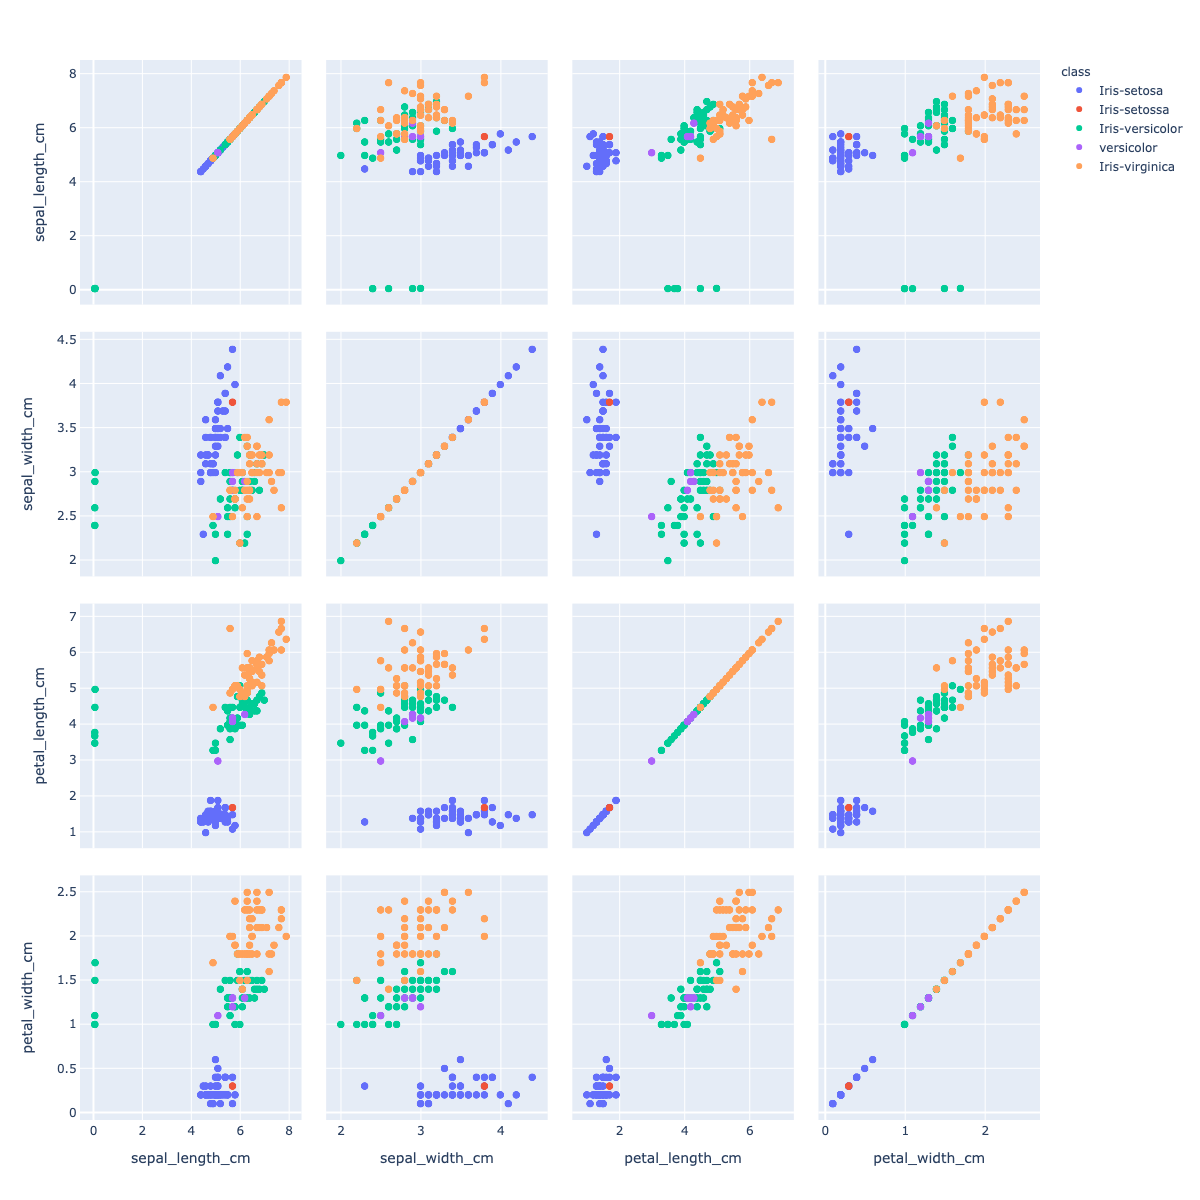

In [7]:
fig = px.scatter_matrix(df, dimensions=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'], color='class', width=width_plot, height=height_plot)

fig.show(renderer='png', width=width_plot, height=height_plot)

In [8]:
df['class'].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [9]:
def rename(x):
    if 'Iris-setossa' in x:
        x = 'Iris-setosa'
    elif 'versicolor' in x:
        x = 'Iris-versicolor'
    return x

In [10]:
df['class'] = df['class'].apply(lambda x: rename(x))

In [11]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

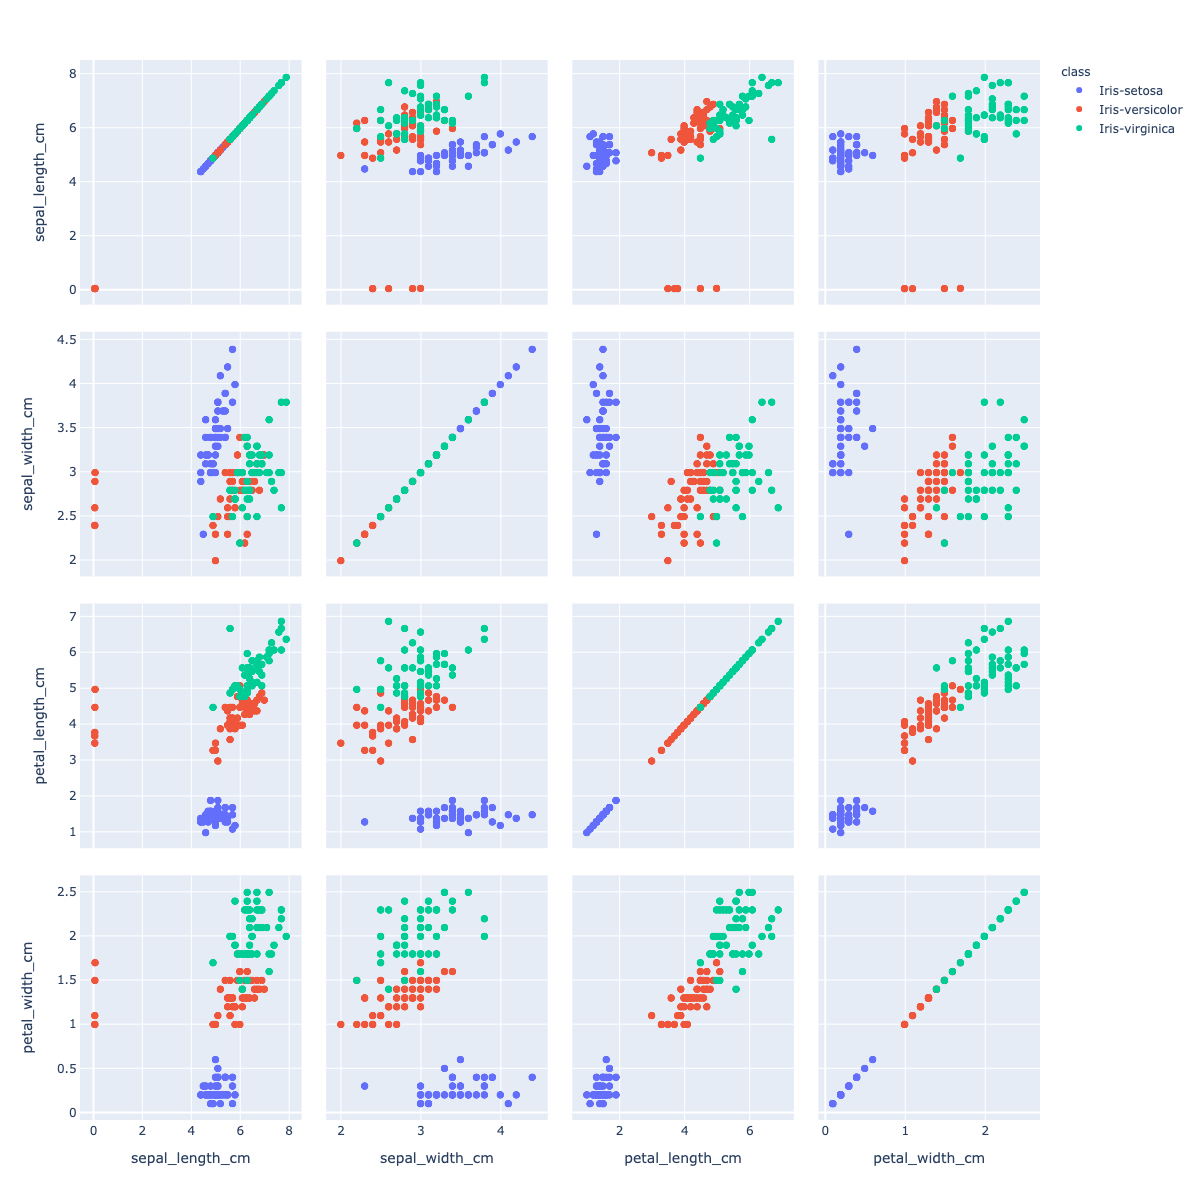

In [13]:
fig = px.scatter_matrix(df, dimensions=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'], color='class', width=width_plot, height=height_plot)

fig.show(renderer='png', width=width_plot, height=height_plot)

In [14]:
sesota = df[(df['class'] == 'Iris-setosa')]

In [15]:
df.loc[(df['petal_width_cm'].isnull() == True), 'petal_width_cm'] = np.mean(sesota['petal_width_cm'])

In [16]:
df.loc[(df.sepal_length_cm < 1), 'sepal_length_cm'] = df.sepal_length_cm * 100

In [17]:
df.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

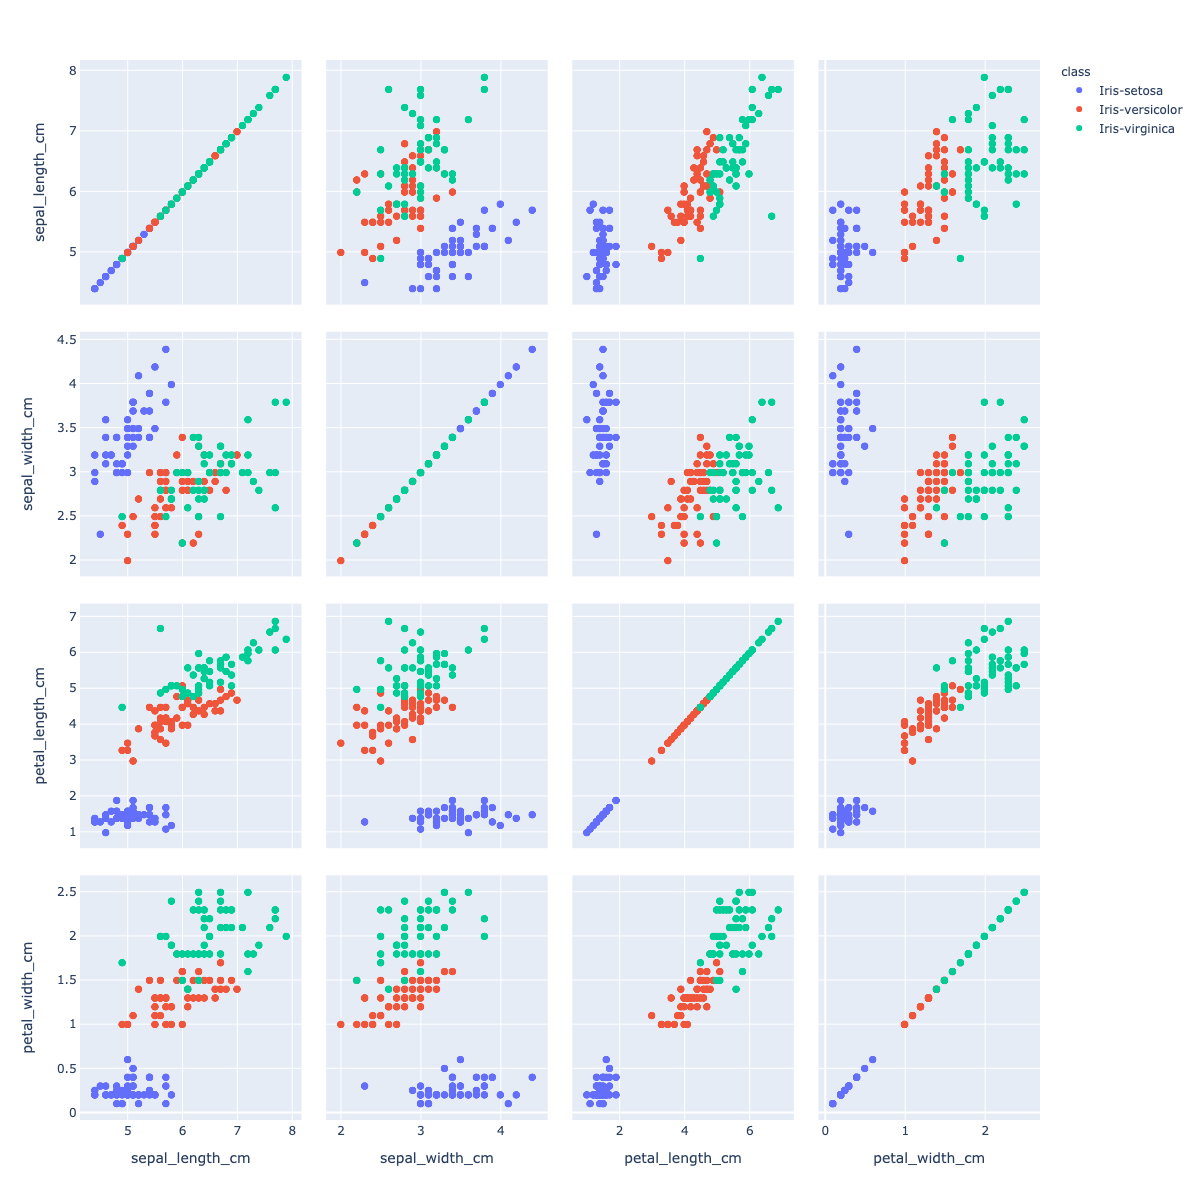

In [18]:
fig = px.scatter_matrix(df, dimensions=['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm'], color='class', width=width_plot, height=height_plot)

fig.show(renderer='png', width=width_plot, height=height_plot)

In [19]:
df.to_csv('../iris-data_clean.csv')